In [1]:
# Регрессия

# Набор факторов -> Конкретное значение

# 28 days ago -> 7 days ahead

In [2]:
import pandas as pd
import sklearn

In [4]:
money = pd.read_csv ("usd_exchange_rate.csv")

In [36]:
def replaceCommaToDot(s):
    return float(s.replace(",", "."))

In [37]:
value = money["curs"].apply(replaceCommaToDot)

In [38]:
past = 7 * 4
future = 7

In [39]:
value

0      72.9299
1      75.9507
2      76.6041
3      76.4275
4      76.5230
        ...   
941    63.8600
942    63.9966
943    63.8700
944    63.8320
945    63.8734
Name: curs, Length: 946, dtype: float64

In [40]:
start = past
end = len(value) - future
print(start, end)

28 939


In [41]:
value[]

SyntaxError: invalid syntax (<ipython-input-41-f202a1f22505>, line 1)

In [42]:
row_df = []
for i in range(start, end):
    past_and_future_values = value[(i-past):(i+future)]
    row_df.append(list(past_and_future_values))

In [43]:
past_columns = [f"past_{i}" for i in range(past)]

In [44]:
future_columns = [f"future_{i}" for i in range(future)]

In [45]:
df = pd.DataFrame(row_df, columns=(past_columns+future_columns))

In [46]:
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,72.9299,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,...,79.4951,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903
1,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,...,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994
2,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,...,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536
3,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,...,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256
4,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,78.9969,...,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256,73.8242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,66.0528,65.9981,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,...,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997
907,65.9981,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,...,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600
908,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,...,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966
909,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,63.9453,...,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966,63.8700


In [47]:
x = df[past_columns][:-1]
y = df[future_columns][:-1]

In [48]:
x_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [49]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

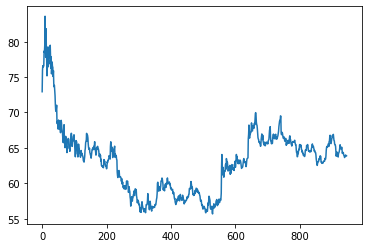

In [50]:
plt.plot(value)
plt.show()

In [51]:
LinReg = LinearRegression()  #Настройка

In [54]:
LinReg.fit(x, y) #Обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
prediction = LinReg.predict(x_test) #Предсказание

In [56]:
prediction

array([[63.90229154, 63.87462141, 63.84695883, 63.93915612, 63.93692321,
        63.95379212, 63.8847385 ]])

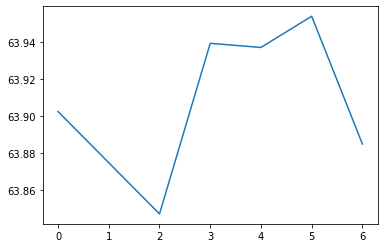

In [58]:
plt.plot(prediction[0])
plt.show()

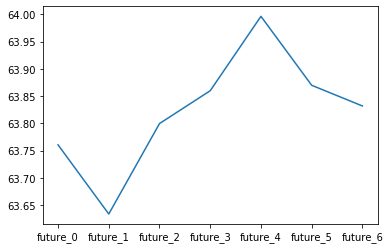

In [59]:
plt.plot(y_test.iloc[0])
plt.show()

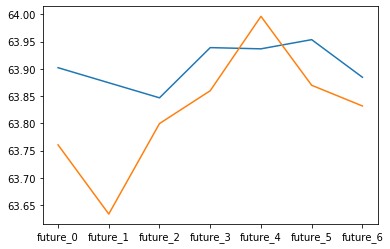

In [60]:
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real")
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
mean_absolute_error(y_test, prediction)

0.10076218757688947

In [68]:
mean_squared_error(y_test, prediction)

0.01429009869552723

In [1]:
#Grid


In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
MLPRegressor()

NameError: name 'MLPRegressor' is not defined

In [ ]:


MLP2 = MLPRegressor()

grid_search = GridSearchCV(MLP2, {activation: [], alpha: []})